In [1]:
#금값 크롤링하기 

import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import pandas as pd

options=Options()
options.add_experimental_option('detach',True) #화면이 꺼지지 않고 유지
options.add_argument('--start-maximized') # 화면을 최대화
service=Service(ChromeDriverManager().install()) #크롬드라이버 자동 설치

driver=webdriver.Chrome(service=service, options=options)


url='https://www.koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html'
driver.get(url)

time.sleep(3)

res1=[]
for i in range(6):                                              
    html=driver.page_source             #페이지정보 받기 ex)처음 나오는 1페이지정보받기 
    res1.append(bs(html,'html.parser'))   #res에 그 정보 받고 담기
    driver.find_element(By.XPATH,'//*[@id="example-table"]/div[3]/span/button[3]').click() #페이지를 클릭하기
    time.sleep(2)                  #다시돌아온다면 2번째 페이지 검색해서 받게됨 



In [13]:
elems=driver.find_elements(By.CLASS_NAME,'tabulator-row')

In [14]:
elems

[<selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="11451cb9-5160-45ab-bbdd-004918ec5421")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="012a2466-84a9-4780-832b-3ce750a69e9e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="fa8250c5-8ca5-456b-9b0b-c0371e619c20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="d8610c54-ad69-4021-8e22-d25a8a1a6710")>]

In [12]:
elems

[<selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="11451cb9-5160-45ab-bbdd-004918ec5421")>]

In [16]:
elems1=driver.find_elements(By.CSS_SELECTOR, 'div.tabulator-row')  

In [22]:
elems2=driver.find_elements(By.CSS_SELECTOR, 'div.tabulator-row')  

In [23]:
elems2

[<selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="11451cb9-5160-45ab-bbdd-004918ec5421")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="012a2466-84a9-4780-832b-3ce750a69e9e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="fa8250c5-8ca5-456b-9b0b-c0371e619c20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="d8610c54-ad69-4021-8e22-d25a8a1a6710")>]

In [28]:
for i in elems1:
    

TypeError: 'WebElement' object is not iterable

In [17]:
elems1

[<selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="11451cb9-5160-45ab-bbdd-004918ec5421")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="012a2466-84a9-4780-832b-3ce750a69e9e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="fa8250c5-8ca5-456b-9b0b-c0371e619c20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a26b6516c68be7396380d5115334ba33", element="d8610c54-ad69-4021-8e22-d25a8a1a6710")>]

In [2]:
res2=[]
for j in res1:
    tmp3=[]
    for i in j.find_all('div','tabulator-row'):
        tmp2=[]
        for k in i:
            k.find_all('div','tabulator-cell')
            tmp2.append(k.text)
        tmp3.append(tmp2)
    res2.append(pd.DataFrame(tmp3))


In [14]:
res_df=pd.concat(res2)
res_df.columns=['날짜','살때 순금','팔때 순금','18k','14k']
res_df

,날짜,살때 순금,팔때 순금,18k,14k
0,2023.02.02,"329,000","295,000","212,400","163,800"
1,2023.02.01,"328,000","295,000","212,400","163,800"
2,2023.01.31,"327,000","295,000","212,400","163,800"
3,2023.01.30,"327,500","295,000","212,400","163,800"
4,2023.01.28,"329,000","295,000","212,400","163,800"
...,...,...,...,...,...
14,2022.11.07,"324,500","292,000","210,300","162,100"
0,2022.11.05,"329,000","291,000","209,600","161,600"
1,2022.11.04,"323,000","290,000","208,800","161,000"
2,2022.11.03,"323,000","291,000","209,600","161,600"


In [10]:
import matplotlib.pyplot as plt


res_df['살때 순금']=pd.to_numeric(res_df['살때 순금'].str.replace(',',''))



In [11]:
buygold=res_df.set_index('날짜').iloc[:,:1]
buygold

,살때 순금
날짜,
2023.02.02,329000
2023.02.01,328000
2023.01.31,327000
2023.01.30,327500
2023.01.28,329000
...,...
2022.11.07,324500
2022.11.05,329000
2022.11.04,323000


C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46412 (\N{HANGUL SYLLABLE DDAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYL

<Figure size 5000x3000 with 0 Axes>

C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46412 (\N{HANGUL SYLLABLE DDAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

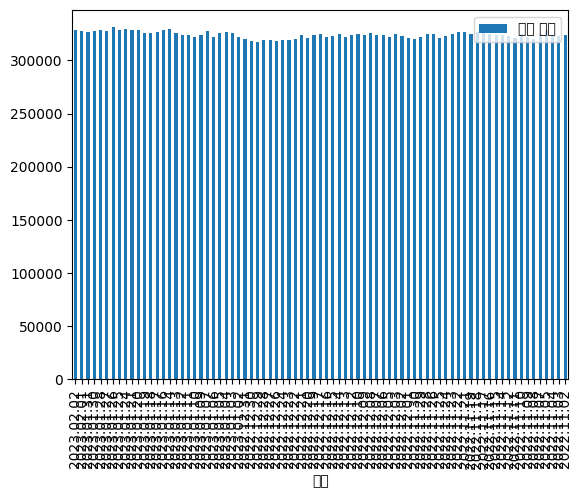

In [12]:
plt.figure(figsize=(50,30))
buygold.plot(kind='bar');

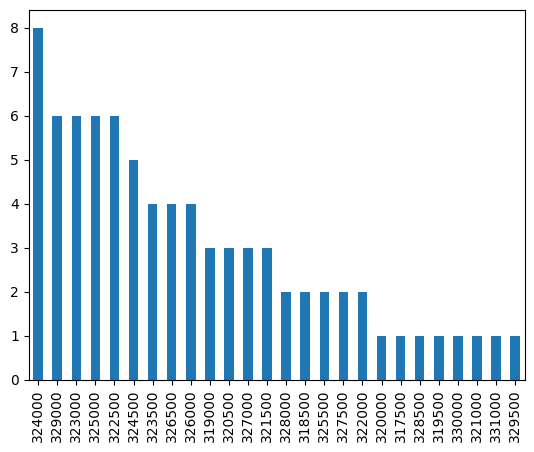

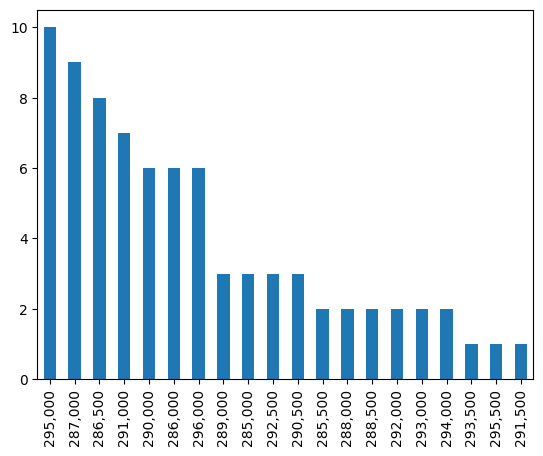

<AxesSubplot: >

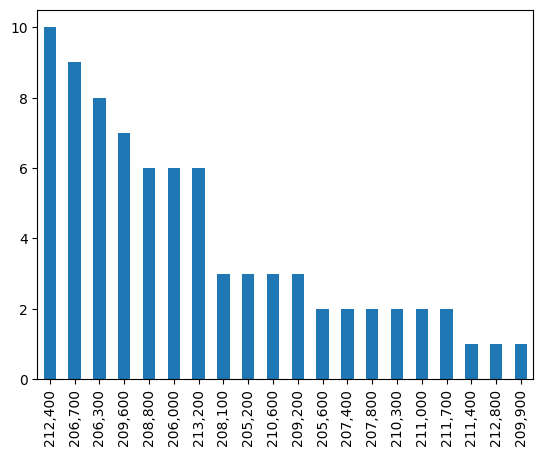

In [13]:
from IPython.display import Image

# seaborn
import seaborn as sns


res_df['살때 순금'].value_counts().plot(kind='bar')
plt.show()
res_df['팔때 순금'].value_counts().plot(kind='bar')
plt.show()
res_df['18k'].value_counts().plot(kind='bar')